# 📊 Exploratory Data Analysis on Student Alcohol Consumption Dataset

This project analyzes how factors like study time, internet access, and alcohol consumption affect student academic performance.

Dataset Source: UCI / Kaggle Student Alcohol Consumption Dataset


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

# Load Dataset

In [3]:
df = pd.read_csv("student-data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Understanding

In [5]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### markdown
The dataset contains student demographic, academic, and lifestyle attributes including alcohol consumption levels and grades.

# Data Cleaning

In [8]:
# Check missing values
pd.isnull(df).sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [12]:
# Convert datatypes if needed
df['age'] = df['age'].astype(int)

#### markdown
The dataset contains no major missing values and requires minimal preprocessing.

# Exploratory Data Analysis

## 🔹 Gender Distribution

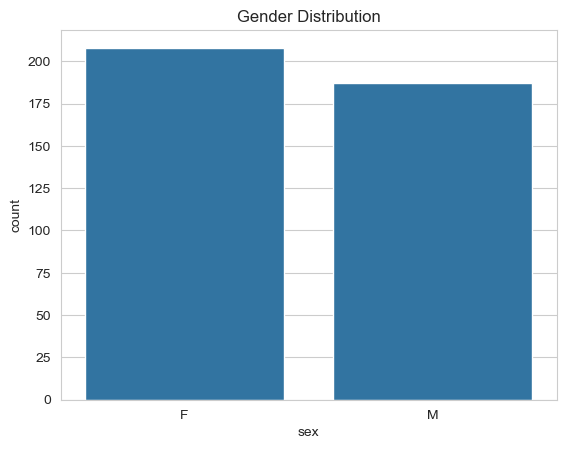

In [26]:
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

#### markdown insight:
The dataset contains both male and female students with nearly balanced representation.

## 🔹 Age Distribution

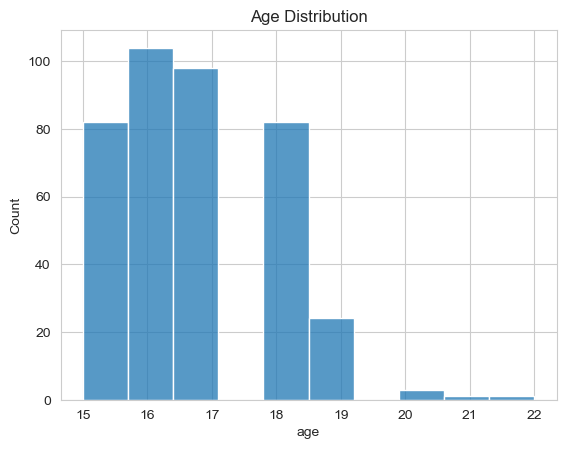

In [30]:
sns.histplot(df['age'], bins=10)
plt.title("Age Distribution")
plt.show()

## 🔹 Study Time vs Final Grades

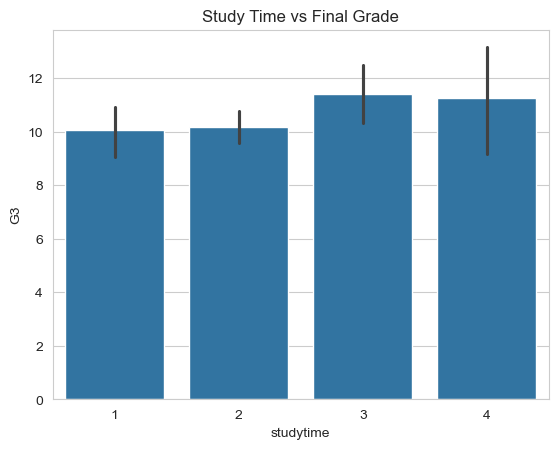

In [33]:
sns.barplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()

#### Insight:
Students with higher study time tend to achieve better final grades.

## 🔹 Alcohol Consumption vs Grades

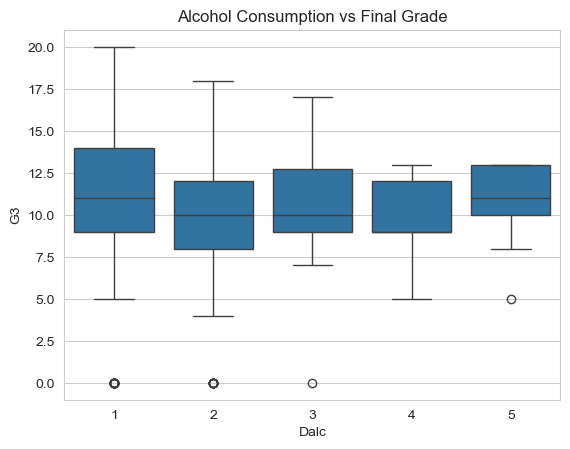

In [38]:
sns.boxplot(x='Dalc', y='G3', data=df)
plt.title("Alcohol Consumption vs Final Grade")
plt.show()

#### Insight:
Higher alcohol consumption shows a slight negative trend with academic performance.

## 🔹 Internet Access Impact

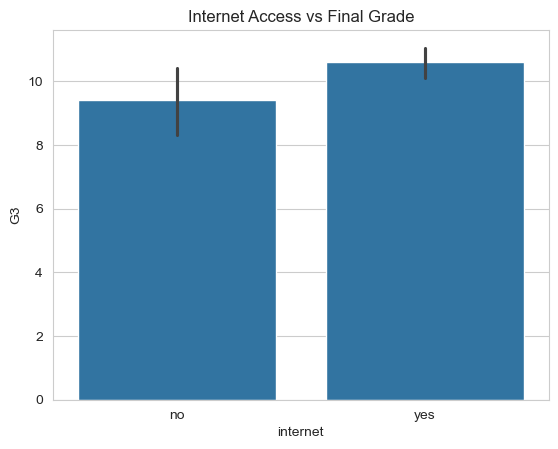

In [42]:
sns.barplot(x='internet', y='G3', data=df)
plt.title("Internet Access vs Final Grade")
plt.show()

## 🔹 Correlation Heatmap

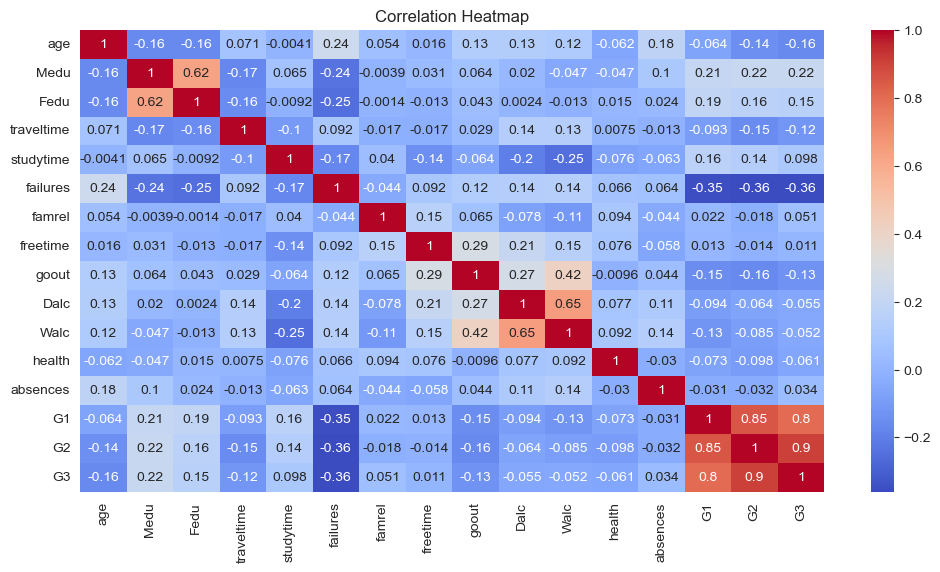

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Insight: 
Past grades (G1, G2) strongly influence final grades (G3).

# Key Insights

### 🔍 Major Findings

• Study time positively impacts student grades  
• Alcohol consumption shows mild negative correlation with performance  
• Internet access slightly improves academic outcomes  
• Previous grades are the strongest predictors of final grades  

These insights can help educators identify student performance patterns.

# Conclusion

This analysis demonstrates that lifestyle factors such as study habits and alcohol consumption influence student academic outcomes.

Future work could involve building predictive models to forecast student performance based on behavioral attributes.

### 👩‍💻 Author
**Ankita Sharma**  
Data Analyst | Python | SQL | Visualization